### Demo - Probabilistic Image Diversification to Improve Segmentation in 3D Microscopy Image Data

In [1]:
## Imports
import numpy as np
import matplotlib.pyplot as plt
from skimage import io
from utils import print_timestamp, plot_image, draw_weights, get_variance, reparametrize

Select a 3D image of your choice, which you want to get diversified. Make sure to adjust the image path given below.

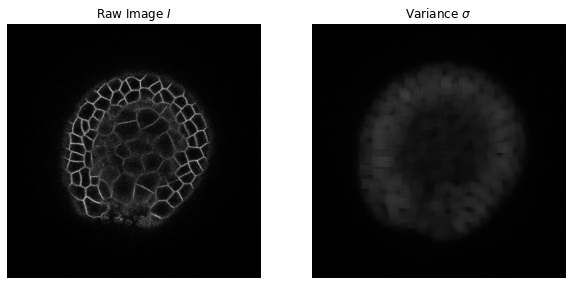

In [2]:
## Data Loading and Normalization
img = io.imread(r'/path/to/image.tif').astype(np.float32)
img -= img.min()
img /= img.max()

## Variance Computation
var_img = get_variance(img, downscale=4, variance_window=(5,5,5))

# Plot Results
plot_image([img,var_img], title=['Raw Image $I$', 'Variance $\sigma$'])

New samples are generated by sampling intensities at each position $\mathbf{x}=(x,y,z)$ from a standard normal distribution $\mathcal{N}$ using the raw image $I$ and estimated variance $\sigma$, following:<br><br>
$$\tilde{I}(\mathbf{x}) = \mathcal{N}(0,1)\cdot w_v\cdot\sigma_\mathbf{x} + w_i\cdot I_\mathbf{x}$$<br>
Weights $w_i$ and $w_v$ control the influence of raw image and variance, respectively.<br>
In the following, please choose the desired weight ranges, the desired strategy and the desired number of samples.

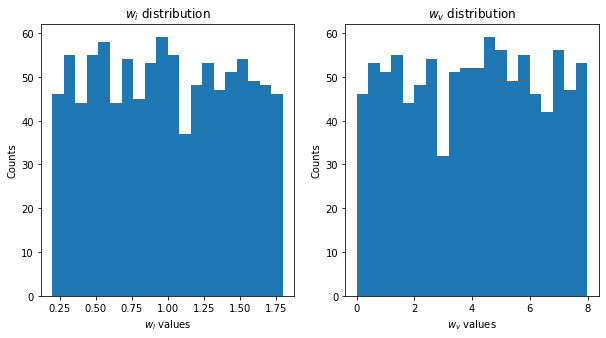

In [3]:
## Set Parameter
w_i_range = [0.2, 1.8] # values are expected to be positive
w_v_range = [0, 8] # lower bound is expected to be >=0
strategy = 'random' # either 'random' or 'structured' or 'singleAug'
num_samples = 4

## Draw 1000 samples to showcase weight distribution
w_i_drawn, w_v_drawn = draw_weights(strategy=strategy, num_samples=1000,\
                                    w_i_range=w_i_range, w_v_range=w_v_range)
fig, ax = plt.subplots(1,2, figsize=[10,5])
ax[0].hist(w_i_drawn, bins=20)
ax[0].set_title('$w_i$ distribution')
ax[0].set_xlabel('$w_i$ values')
ax[0].set_ylabel('Counts')
ax[1].hist(w_v_drawn, bins=20)
ax[1].set_title('$w_v$ distribution')
ax[1].set_xlabel('$w_v$ values')
ax[1].set_ylabel('Counts')
plt.show()

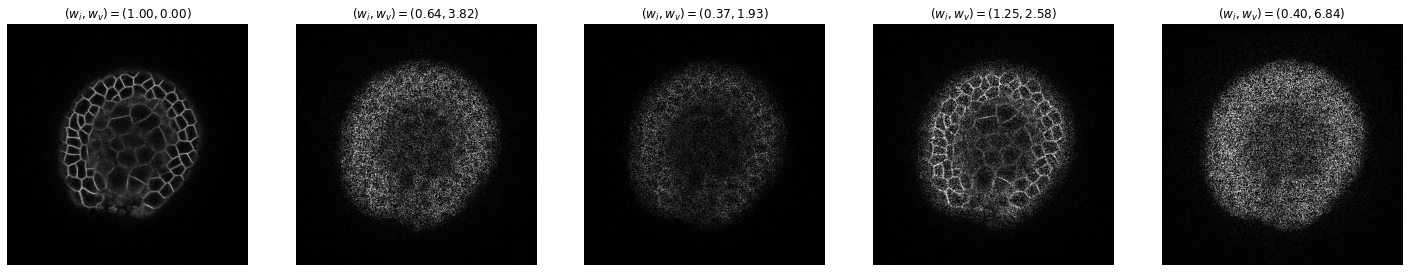

In [4]:
## Get Weights
mean_weights, variance_weights = draw_weights(strategy=strategy, num_samples=num_samples,\
                                              w_i_range=w_i_range, w_v_range=w_v_range)
        
        
## Generate Samples
image_stack = []
for num_sample in range(num_samples+1):
    image_stack.append(reparametrize(img, var_img,\
                                     mean_weight=mean_weights[num_sample],\
                                     var_weight=variance_weights[num_sample]))

## Plot Image Stack
title_str = ['$(w_i,w_v)=({0:.2f},{1:.2f})$'.format(wi,wv) for wi,wv in zip(mean_weights,variance_weights)]
plot_image(image_stack, title=title_str)